In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,TimeSeriesSplit
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostRegressor
import numpy as np
import datetime as dt
import cbpro
import matplotlib.pyplot as plt 
import time
apiKey = "###"
apiSecret = "###"
passphrase = "###"

auth_client = cbpro.AuthenticatedClient(apiKey,apiSecret,passphrase)
auth_client_df = pd.DataFrame(auth_client.get_accounts()) 
auth_client_df.to_csv('Current_info.csv')
current_info = pd.read_csv('Current_info.csv') 
current_info = current_info.drop(['Unnamed: 0'],axis=1)
pie = current_info['available'][[8,12,16,18,20,22,24,26]] 
# plt.pie(pie)
# plt.legend([current_info['currency'][8],current_info['currency'][12],current_info['currency'][16],
#             current_info['currency'][18],current_info['currency'][20],
#             current_info['currency'][22], #current_info['currency'][23]
#             current_info['currency'][24],current_info['currency'][26]]) 

# plt.show()
# plt.close()
current_info



,id,currency,balance,hold,available,profile_id,trading_enabled
0,1aaae600-abd9-4c2f-85f5-cd5d21761c61,00,0.0,0.0,0.0,0c27c1d2-eb5a-4cf0-9165-d886b90c405c,True
1,f3b660ca-7caa-4722-a166-b28d999ab953,1INCH,0.0,0.0,0.0,0c27c1d2-eb5a-4cf0-9165-d886b90c405c,True
2,0d987199-13c7-4608-98b0-3032023f38a8,AAVE,0.0,0.0,0.0,0c27c1d2-eb5a-4cf0-9165-d886b90c405c,True
3,e31ceba7-c9f3-400b-b22d-9ea7df90e712,ABT,0.0,0.0,0.0,0c27c1d2-eb5a-4cf0-9165-d886b90c405c,True
4,d99b74cb-c8f7-46a0-ab9e-edca4ac20646,ACH,0.0,0.0,0.0,0c27c1d2-eb5a-4cf0-9165-d886b90c405c,True
...,...,...,...,...,...,...,...
228,411058de-746b-4449-beda-c9b424b0b9b7,YFI,0.0,0.0,0.0,0c27c1d2-eb5a-4cf0-9165-d886b90c405c,True
229,5d98bf90-21eb-4aaf-8c0f-967457feb3d7,YFII,0.0,0.0,0.0,0c27c1d2-eb5a-4cf0-9165-d886b90c405c,True
230,1506b816-c0e2-4478-b006-e282c7a5232f,ZEC,0.0,0.0,0.0,0c27c1d2-eb5a-4cf0-9165-d886b90c405c,True
231,8472d976-8ba4-4c6e-9827-5a25148cc419,ZEN,0.0,0.0,0.0,0c27c1d2-eb5a-4cf0-9165-d886b90c405c,True


In [23]:
assets = pd.DataFrame(auth_client.get_currencies())
assets.to_csv('assets.csv',index=False)
assets['name']

0           Rai Reflex Index
1               Boba Network
2                  Avalanche
3      Measurable Data Token
4            Cryptex Finance
               ...          
246                     Drep
247                    1Inch
248                   Enzyme
249                   Orchid
250            Kyber Network
Name: name, Length: 251, dtype: object

In [5]:
def current_price(currency):
    currency = currency
    Period = 3600   
    historicData = auth_client.get_product_historic_rates(currency, granularity=Period)
    #     print(historicData)
            # Make an array of the historic price data from the matrix
    price = np.squeeze(np.asarray(np.matrix(historicData)[:,4]))
            # Wait for 1 second, to avoid API limit
    time.sleep(1)
            # Get latest data and show to the user for reference
    newData = auth_client.get_product_ticker(product_id=currency)
    currentPrice=newData['price']
    print('currency: {}'.format(currency))
    print('current_price {} \n\n'.format(currentPrice))
    return currentPrice

def history(currency):
    currency = currency
    Period = 300        
    historicData = auth_client.get_product_historic_rates(currency, granularity=Period)
    historicData = pd.DataFrame(historicData,columns=['time','open','high','low','close','volume'])
    price = historicData['high']
            # Wait for 1 second, to avoid API limit
    time.sleep(1)
    return historicData
def profit_target(token,current_holdings,target_percentage): 
    token = token
    print('\n\n {} target'.format(token))
    current_holdings = current_holdings
    target_percentage = current_holdings * .3 
    total_target = current_holdings+target_percentage
    print('{} profit target {}, == {}'.format(token,target_percentage,total_target))
    return target_percentage 
def loss(token,current_holdings,loss):
    token = token
    print('\n\n {} loss'.format(token))
    current_holdings = current_holdings
    target_percentage = current_holdings * .1 
    total_loss = current_holdings-target_percentage
    print('{} stop loss {}, == {}'.format(token,target_percentage,total_loss)) 
    return target_percentage 

# current_priceDNT = current_price('dnt-usd')
current_priceBTC = current_price('btc-usd')
current_priceLTC = current_price('ltc-usd')
current_priceXLM = current_price('xlm-usd')
# current_priceXRP = current_price('xrp-usd') 
current_priceXTZ = current_price('xtz-usd') 
current_priceZRX = current_price('zrx-usd') 

# auth_client_dnt = current_info['available'][8]
# print('available {}: {}\n\n'.format(current_info['currency'][8],auth_client_dnt)) 
# auth_client_link = current_info['available'][14]
# print('available {}: {}\n\n'.format(current_info['currency'][14],auth_client_link))
auth_client_btc = current_info['available'][16]
print('available {}: {}\n\n'.format(current_info['currency'][16],auth_client_btc))

auth_client_ltc = current_info['available'][16]
print('available {}: {}\n\n'.format(current_info['currency'][16],auth_client_ltc))

auth_client_xlm = current_info['available'][22]
print('available {}: {}\n\n'.format(current_info['currency'][22],auth_client_xlm)) 
# auth_client_xrp = current_info['available'][23]
# print('available {}: {}\n\n'.format(current_info['currency'][23],auth_client_xrp))
auth_client_xtz = current_info['available'][24]  
print('available {}: {}\n\n'.format(current_info['currency'][24],auth_client_xtz))
auth_client_zrx = current_info['available'][26]  
print('available {}: {}\n\n'.format(current_info['currency'][26],auth_client_zrx)) 

current_btc = float(current_priceBTC) * float(auth_client_btc) 
print('current btc balance: {}\n\n'.format(current_btc))
current_ltc = float(current_priceLTC) * float(auth_client_ltc)  
print('current ltc balance: {}\n\n'.format(current_ltc))
# current_oxt = float(current_priceOXT) * float(auth_client_oxt) 
# print('current oxt balance: {}\n\n'.format(current_oxt))
current_xlm = float(current_priceXLM) * float(auth_client_xlm)
print('current xlm balance: {}\n\n'.format(current_xlm))
# current_link = float(current_priceLink) * float(auth_client_link) 
# print('current xrp balance: {}\n\n'.format(current_xrp))
current_xtz = float(current_priceXTZ) * float(auth_client_xtz)
print('current xtz balance: {}\n\n'.format(current_xtz))
# current_knc = float(current_priceKNC) * float(auth_client_knc)
# print('current knc balance: {}\n\n'.format(current_knc))
current_zrx = float(current_priceZRX) * float(auth_client_zrx)
print('current zrx balance: {}\n\n'.format(current_zrx))
# current_eos = float(current_priceEOS) * float(auth_client_eos)
# print('current zrx balance: {}\n\n'.format(current_eos))

print('-->PROFIT TARGETS:')
btc_tar = profit_target('dnt',current_btc, .3)  
ltc_tar = profit_target('ltc',current_ltc, .3) 
xlm_tar = profit_target('xlm',current_xlm, .3)
# link_tar = profit_target('link',current_link, .3)
xtz_tar = profit_target('xtz',current_xtz, .3) 
zrx_tar = profit_target('zrx',current_zrx, .3) 
print('\n\n -->MAX LOSS:')
btc_loss = loss('dnt',current_btc, .1)
ltc_loss = loss('ltc',current_ltc, .1)   
xlm_loss = loss('xlm',current_xlm, .1)
# link_loss = loss('link',current_xrp, .1)
xtz_loss = loss('xtz',current_xtz, .1)  
zrx_loss = loss('zrx',current_zrx, .1)

currency: btc-usd
current_price 23108.8 


currency: ltc-usd
current_price 89.57 


currency: xlm-usd
current_price 0.09255 


currency: xtz-usd
current_price 1.094 


currency: zrx-usd
current_price 0.226419 


available API3: 0.0


available API3: 0.0


available ATOM: 0.0


available AURORA: 0.0


available AVT: 0.0


current btc balance: 0.0


current ltc balance: 0.0


current xlm balance: 0.0


current xtz balance: 0.0


current zrx balance: 0.0


-->PROFIT TARGETS:


 dnt target
dnt profit target 0.0, == 0.0


 ltc target
ltc profit target 0.0, == 0.0


 xlm target
xlm profit target 0.0, == 0.0


 xtz target
xtz profit target 0.0, == 0.0


 zrx target
zrx profit target 0.0, == 0.0


 -->MAX LOSS:


 dnt loss
dnt stop loss 0.0, == 0.0


 ltc loss
ltc stop loss 0.0, == 0.0


 xlm loss
xlm stop loss 0.0, == 0.0


 xtz loss
xtz stop loss 0.0, == 0.0


 zrx loss
zrx stop loss 0.0, == 0.0


Analyzing and predicting cryptocurrency. 




(300, 6)


C:\Users\peace\Anaconda3_2\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


TimeSeriesSplit(max_train_size=None, n_splits=5)
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49] TEST: [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99] TEST: [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  2

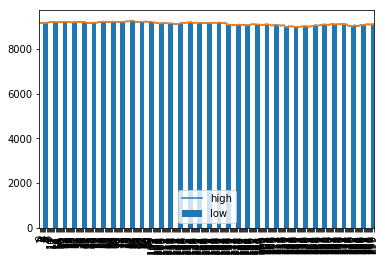

current btc balance 9164.85
current btc price 9164.85
predicted high btc portfolio balance [9119.65149422]
predicted high btc [9119.65149422]
buying BTC
buying XLM
buying XTZ
buying XLM


,time,open,high,low,close,volume
996,1590159600000,9137.800000,9144.200000,9144.2,9137.763951,5.029414
997,1590159900000,9143.800000,9144.746845,9144.8,9143.788872,5.628120
998,1590160200000,9144.746845,9143.573983,9144.8,9135.000000,4.917761
999,1590160500000,9144.700000,9176.000000,9176.0,9144.700000,12.665455
1000,1590160800000,9176.000000,9174.400000,9185.5,9173.500000,46.094611


In [14]:
def pred_btc(data,bata):
    iteration=1
    print('Analyzing and predicting cryptocurrency. \n\n\n\n')
    data = history('btc-usd')
    data.to_csv('btc_high.csv')
    print(data.shape)
    data.head()
#     ma5 = moving_5average(data) 
#     ma25 = moving_25average(data)
#     ma50 = moving_50average(data) 
#     ma75 = moving_75average(data)
#     ma100 = moving_100average(data)
#     # plt.plot(ma20,c='black')
#     # plt.plot(ma100,c = 'white')
#     plt.subplot(2, 1, 1)
#     plt.plot(ma5,c='black')
#     plt.plot(ma25,c='orange')
#     plt.plot(ma50,c='pink')
#     plt.plot(ma75,c='gray')
#     plt.plot(ma100,c='white')
#     plt.ylabel('price')

#     plt.subplot(2, 1, 2)
#     plt.plot(data)
#     plt.xlabel('time (m)')
#     plt.ylabel('price')
#     plt.show()
#     plt.savefig('5-100_moving_average')
#     plt.close
    data.describe()
    data.corr()
    data[['low']].plot.bar()
    high = data[['high']]
    plt.plot(high)
    plt.legend(['high','low']) 
    plt.savefig('images/high_low.png')
    y = data['high']
    X = data.drop(['high'],axis=1) 
    mini = MinMaxScaler() 
    X = mini.fit_transform(X) 
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.6) 
    reg = LinearRegression(normalize=True,n_jobs=-1)
    reg.fit(X_train,y_train)
    tscv = TimeSeriesSplit(n_splits=5)
    print(tscv)  
    TimeSeriesSplit(max_train_size=None, n_splits=4)
    for train_index, test_index in tscv.split(X):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
    from sklearn.externals import joblib
#     joblib.dump(reg, 'models/tscv_1.pkl')
    bata =  pd.read_csv(bata)
    bata.shape
    date = bata['time'] 
    print(bata.tail())
    print(X.shape)
    future_x = X 
    X = X[-1:] 
    bata = bata
    date = bata['time'] 
    date = date.tail()
    bata = bata.tail() 
    date = bata['time']
    y = reg.predict(future_x) 
    print('accuracy {}'.format(reg.score(X_test,y_test)))
    y_df = pd.DataFrame(y) 
    y_df.to_csv('pred.csv')
    y
    plt.plot(y) 
    plt.show()
    plt.savefig('images/PREDICTED_HIGH.png')    
    plt.close()
    print('current btc balance {}'.format(current_btc))
    print('current btc price',current_priceBTC)
    print('predicted high btc portfolio balance',y[-1:]*auth_client_btc)
    print('predicted high btc',y[-1:])
#     if float(current_priceBTC)-120.00 <= float(y[-1:]):         
#         print('selling LTC')
#         auth_client.place_market_order(product_id='LTC-USD',side='sell',size='2.57')     
#         print('selling XLM')
#         auth_client.place_market_order(product_id='XLM-USD',side='sell',size='')  
#         print('selling XTZ')
#         auth_client.place_market_order(product_id='XTZ-USD',side='sell',size='3.6')  
#         print('selling ZRX')
#         auth_client.place_market_order(product_id='ZRX-USD',side='sell',size='25')  
#         print('buying BTC')
#         auth_client.place_market_order(product_id='BTC-USD', 
#                                                side='buy', 
#                                                funds='10.00') 
#         fills1 = pd.DataFrame(auth_client.get_fills(product_id="LTC-USD")) 
#         fills2 = pd.DataFrame(auth_client.get_fills(product_id="ZRX-USD"))
#         fills3 = pd.DataFrame(auth_client.get_fills(product_id="XTZ-USD"))
#         fills4 = pd.DataFrame(auth_client.get_fills(product_id="XLM-USD"))
#         fills5 = pd.DataFrame(auth_client.get_fills(product_id="BTC-USD"))
#         fills1.to_csv('btc_sell_fills.csv')
#         fills2.to_csv('zrx_sell_fills.csv') 
#         fills3.to_csv('xtz_sell_fills.csv') 
#         fills4.to_csv('xlm_sell_fills.csv') 
#         fills5.to_csv('BTC_sell_fills.csv') 
#     if float(current_priceBTC)+150.00 >= float(y[-1:]): 
#         print('selling btc')
#         auth_client.place_market_order(product_id='BTC-USD',side='sell',size='.003')
    print('buying BTC')
    auth_client.place_market_order(product_id='BTC-USD', 
                                                   side='buy', 
                                                   funds='10.00')  
    print('buying XLM')
    auth_client.place_market_order(product_id='XLM-USD', 
                                                   side='buy', 
                                                   funds='5.00')     
    print('buying XTZ')
    auth_client.place_market_order(product_id='XTZ-USD', 
                                                   side='buy', 
                                                   funds='9.00')   

    print('buying XLM')
    auth_client.place_market_order(product_id='ZRX-USD', 
                                                   side='buy', 
                                                   funds='4.00')   

    fills1 = pd.DataFrame(auth_client.get_fills(product_id="BTC-USD")) 
    fills2 = pd.DataFrame(auth_client.get_fills(product_id="ZRX-USD"))
    fills3 = pd.DataFrame(auth_client.get_fills(product_id="XTZ-USD"))
    fills4 = pd.DataFrame(auth_client.get_fills(product_id="XLM-USD"))
#     fills5 = pd.DataFrame(auth_client.get_fills(product_id="LTC-USD"))
    fills1.to_csv('btc_buy_fills.csv')
    fills2.to_csv('zrx_buy_fills.csv') 
    fills3.to_csv('xtz_buy_fills.csv') 
    fills4.to_csv('xlm_buy_fills.csv') 
#     fills5.to_csv('xrp_buy_fills.csv')   
    #         pd.DataFrame(fills1)   

#     if float(y[-1:]) == float(current_priceBTC):
#         print('holding')
    time.sleep(10)
    iteration += 1     
    return bata.tail()
pred_btc('data/crypto/crypto_portfolio/5m/bitfinex_btcusd.csv','data/crypto/crypto_portfolio/5m/bitfinex_btcusd.csv')

Analyzing and predicting cryptocurrency. 




(300, 6)


C:\Users\peace\Anaconda3_2\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


TimeSeriesSplit(max_train_size=None, n_splits=5)
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49] TEST: [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99] TEST: [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  2

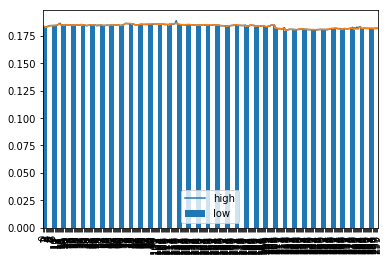

current oxt balance 29.112900000000003
current oxt price 0.1831
predicted high oxt portfolio balance [28.89739162]
predicted high oxt [0.1817446]
Selling KNC
selling oxt
selling EOS


,time,open,high,low,close,volume


In [342]:
def pred_oxt(data,bata):
    iteration=1
    print('Analyzing and predicting cryptocurrency. \n\n\n\n')
    data = history('oxt-usd')
    print(data.shape)
    data.head()
    data.describe()
    data.corr()
    data[['low']].plot.bar()
    high = data[['high']]
    plt.plot(high)
    plt.legend(['high','low']) 
    plt.savefig('images/high_low.png')
    y = data['high']
    X = data.drop(['high'],axis=1) 
    mini = MinMaxScaler() 
    X = mini.fit_transform(X) 
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.6) 
    reg = LinearRegression(normalize=True,n_jobs=-1)
    reg.fit(X_train,y_train)
    tscv = TimeSeriesSplit(n_splits=5)
    print(tscv)  
    TimeSeriesSplit(max_train_size=None, n_splits=4)
    for train_index, test_index in tscv.split(X):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
    from sklearn.externals import joblib
#     joblib.dump(reg, 'models/tscv_1.pkl')
    bata =  pd.read_csv(bata)
    bata.shape
    date = bata['time'] 
    print(bata.tail())
    print(X.shape)
    future_x = X 
    X = X[-1:] 
    bata = bata
    date = bata['time'] 
    date = date.tail()
    bata = bata.tail() 
    date = bata['time']
    y = reg.predict(future_x) 
    y = reg.score(X_test,y_test)
    y_df = pd.DataFrame(y) 
    y_df.to_csv('pred.csv')
    y
    plt.plot(y) 
    plt.show()
    plt.savefig('images/PREDICTED_HIGH.png')    
    plt.close()
    print('current oxt balance {}'.format(current_oxt))
    print('current oxt price',current_priceOXT)
    print('predicted high oxt portfolio balance',y[-1:]*auth_client_oxt)
    print('predicted high oxt',y[-1:])
    if float(y[-1:]) <= float(current_priceOXT):
        print('BUYING EOS')
        auth_client.place_market_order(product_id='EOS-USD', 
                                           side='buy', 
                                           funds='5.67') 
        print('buying oxt')
        auth_client.place_market_order(product_id='OXT-USD', 
                                           side='buy', 
                                           funds='5.67')    
        print('Selling KNC')
        auth_client.place_market_order(product_id='KNC-USD',side='sell',size='11.8')        

    if float(y[-1:]) >= float(current_priceOXT):
        print('selling oxt')
        auth_client.place_market_order(product_id='OXT-USD',side='sell',size='31')
        print('selling EOS')
        auth_client.place_market_order(product_id='EOS-USD',side='sell',size='2')
        print('buying knc')
        auth_client.place_market_order(product_id='KNC-USD', 
                                           side='buy', 
                                           funds='5.67')    
   
        
    if float(y[-1:]) == float(current_priceOXT):
        print('holding')
    time.sleep(10)
    iteration += 1     
    return bata.tail()
pred_oxt('data/crypto/crypto_portfolio/5m/bitfinex_oxtusd.csv','data/crypto/crypto_portfolio/5m/bitfinex_oxtusd.csv')

In [ ]:
def pred_ltc(data,bata):
    iteration=1
    print('Analyzing and predicting cryptocurrency. \n\n\n\n')
    data = history('ltc-usd')
    print(data.shape)
    data.head()
    data.describe()
    data.corr()
    data[['low']].plot.bar()
    high = data[['high']]
    plt.plot(high)
    plt.legend(['high','low']) 
    plt.savefig('images/high_low.png')
    y = data['high']
    X = data.drop(['high'],axis=1) 
    mini = MinMaxScaler() 
    X = mini.fit_transform(X) 
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.6) 
    reg = LinearRegression(normalize=True,n_jobs=-1)
    reg.fit(X_train,y_train)
    tscv = TimeSeriesSplit(n_splits=5)
    print(tscv)  
    TimeSeriesSplit(max_train_size=None, n_splits=4)
    for train_index, test_index in tscv.split(X):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
    from sklearn.externals import joblib
#     joblib.dump(reg, 'models/tscv_1.pkl')
    bata =  pd.read_csv(bata)
    bata.shape
    date = bata['time'] 
    print(bata.tail())
    print(X.shape)
    future_x = X 
    X = X[-1:] 
    bata = bata
    date = bata['time'] 
    date = date.tail()
    bata = bata.tail() 
    date = bata['time']
    y = reg.predict(future_x) 
    y_df = pd.DataFrame(y) 
    y_df.to_csv('pred.csv')
    y
    plt.plot(y) 
    plt.show()
    plt.savefig('images/PREDICTED_HIGH.png')    
    plt.close()
    print('current ltc balance {}'.format(current_ltc))
    print('current ltc price',current_priceltc)
    print('predicted high ltc portfolio balance',y[-1:]*auth_client_ltc)
    print('predicted high ltc',y[-1:])
    if float(y[-1:]) <= float(current_priceLTC):
        print('buying ltc')
        auth_client.place_market_order(product_id='LTC-USD', 
                                           side='buy', 
                                           funds='20.00')    
      

    if float(y[-1:]) >= float(current_priceLTC):
        print('selling ltc')
        auth_client.place_market_order(product_id='LTC-USD',side='sell',size='.42')
   
        
    if float(y[-1:]) == float(current_priceLTC):
        print('holding')
    time.sleep(10)
    iteration += 1     
    return bata.tail()
pred_ltc('data/crypto/crypto_portfolio/5m/bitfinex_ltcusd.csv','data/crypto/crypto_portfolio/5m/bitfinex_ltcusd.csv') 

Analyzing and predicting cryptocurrency. 




(300, 6)


C:\Users\peace\Anaconda3_2\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


TimeSeriesSplit(max_train_size=None, n_splits=5)
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49] TEST: [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99] TEST: [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  2

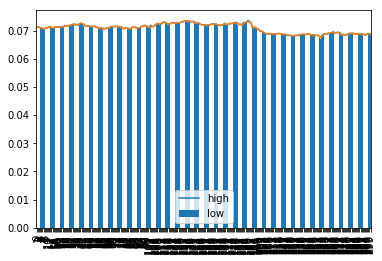

current xlm balance 21.524817000000002
current xlm price 0.071039
predicted high xlm portfolio balance [20.85238626]
predicted high xlm [0.06881976]
selling ZRX


,time,open,high,low,close,volume
385,1588262400000,0.068995,0.068995,0.068995,0.068995,87.000000
386,1588263300000,0.069275,0.069275,0.069275,0.069275,104.040000
387,1588264200000,0.068589,0.068347,0.068589,0.068347,3287.187440
388,1588265100000,0.068332,0.068312,0.068332,0.068312,974.938855
389,1588266900000,0.068085,0.067777,0.068085,0.067777,2411.618807


In [340]:
def pred_xlm(data,bata):
    print('Analyzing and predicting cryptocurrency. \n\n\n\n')
    data = history('xlm-usd')
    print(data.shape)
    data.head()
    data.describe()
    data.corr()
    data[['low']].plot.bar()
    high = data[['high']]
    plt.plot(high)
    plt.legend(['high','low']) 
    plt.savefig('images/high_low.png')
    y = data['high']
    X = data.drop(['high'],axis=1) 
    mini = MinMaxScaler() 
    X = mini.fit_transform(X) 
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.6) 
    reg = LinearRegression(normalize=True,n_jobs=-1)
    reg.fit(X_train,y_train)
    tscv = TimeSeriesSplit(n_splits=5)
    print(tscv)  
    TimeSeriesSplit(max_train_size=None, n_splits=4)
    for train_index, test_index in tscv.split(X):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
    from sklearn.externals import joblib
#     joblib.dump(reg, 'models/tscv_1.pkl')
    bata =  pd.read_csv(bata)
    bata.shape
    date = bata['time'] 
    print(bata.tail())
    print(X.shape)
    future_x = X 
    X = X[-1:] 
    bata = bata
    date = bata['time'] 
    date = date.tail()
    bata = bata.tail() 
    date = bata['time']
    y = reg.predict(future_x) 
    y_df = pd.DataFrame(y) 
    y_df.to_csv('pred.csv')
    y
    plt.plot(y) 
    plt.show()
    plt.savefig('images/PREDICTED_HIGH.png')    
    plt.close()
    print('current xlm balance {}'.format(current_xlm))
    print('current xlm price',current_priceXLM)
    print('predicted high xlm portfolio balance',y[-1:]*auth_client_xlm)
    print('predicted high xlm',y[-1:])
    if float(y[-1:]) <= float(current_priceXLM):
        print('buying ZRX')
        auth_client.place_market_order(product_id='ZRX-USD', 
                                           side='buy', 
                                           funds='5.67') 
        print('buying XLM')
        auth_client.place_market_order(product_id='XLM-USD', 
                                           side='buy', 
                                           funds='5.67')  
        print('Selling KNC')
        auth_client.place_market_order(product_id='KNC-USD',side='sell',size='2.2')
        fills1_ = pd.DataFrame(auth_client.get_fills(product_id="XLM-USD")) 
        fills2_ = pd.DataFrame(auth_client.get_fills(product_id="ZRX-USD"))
        fills3_ = pd.DataFrame(auth_client.get_fills(product_id="KNC-USD"))
        df_ = fills1_.append(fills2_)
        fills_ = df_.append(fills3_)
        fills_.to_csv('filled_ordersxlmbuy.csv')     
        pd.DataFrame(fills_)
    if float(y[-1:]) >= float(current_priceXLM):
        print('selling XLM')
        auth_client.place_market_order(product_id='XLM-USD',side='sell',size='82') 
        print('selling ZRX')
        auth_client.place_market_order(product_id='ZRX-USD',side='sell',size='55')
        print('Buying KNC')
        auth_client.place_market_order(product_id='KNC-USD', 
                                           side='buy', 
                                           funds='5.67')  
        fills1 = pd.DataFrame(auth_client.get_fills(product_id="XLM-USD")) 
        fills2 = pd.DataFrame(auth_client.get_fills(product_id="ZRX-USD"))
        fills3 = pd.DataFrame(auth_client.get_fills(product_id="KNC-USD"))
        df = fills1.append(fills2)
        fills = df.append(fills3) 
        fills.to_csv('filled_ordersxlmsell.csv')
        pd.DataFrame(fills)
    if float(y[-1:]) == float(current_priceXLM):
        print('holding')

    return bata.tail()
pred_xlm('data/crypto/crypto_portfolio/15m/bitfinex_xlmusd.csv','data/crypto/crypto_portfolio/15m/bitfinex_xlmusd.csv')

Analyzing and predicting cryptocurrency. 




(300, 6)


C:\Users\peace\Anaconda3_2\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


TimeSeriesSplit(max_train_size=None, n_splits=5)
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49] TEST: [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99] TEST: [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  2

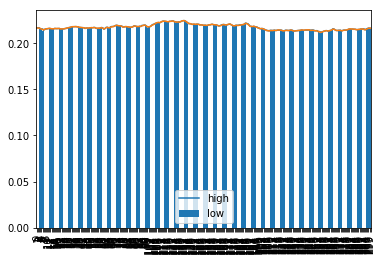

current xrp balance 10.82
current xrp price 0.2164
predicted high xrp portfolio balance [10.80627668]
predicted high xrp [0.21612553]
selling XRP


,time,open,high,low,close,volume
529,1588263300000,0.21701,0.21495,0.21701,0.21438,282239.731778
530,1588264200000,0.21495,0.21243,0.21497,0.21239,492005.305383
531,1588265100000,0.21239,0.21456,0.21489,0.21212,278422.940872
532,1588266000000,0.21440,0.21460,0.21460,0.21358,55224.692196
533,1588266900000,0.21439,0.21227,0.21439,0.21213,158292.713261


In [339]:
def pred_xrp(data,bata):
    print('Analyzing and predicting cryptocurrency. \n\n\n\n')
    data = history('xrp-usd')
    print(data.shape)
    data.head()
    data.describe()
    data.corr()
    data[['low']].plot.bar()
    high = data[['high']]
    plt.plot(high)
    plt.legend(['high','low']) 
    plt.savefig('images/high_low.png')
    y = data['high']
    X = data.drop(['high'],axis=1) 
    mini = MinMaxScaler() 
    X = mini.fit_transform(X) 
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.6) 
    reg = LinearRegression(normalize=True,n_jobs=-1)
    reg.fit(X_train,y_train)
    tscv = TimeSeriesSplit(n_splits=5)
    print(tscv)  
    TimeSeriesSplit(max_train_size=None, n_splits=4)
    for train_index, test_index in tscv.split(X):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
    from sklearn.externals import joblib
#     joblib.dump(reg, 'models/tscv_1.pkl')
    bata =  pd.read_csv(bata)
    bata.shape
    date = bata['time'] 
    print(bata.tail())  
    print(X.shape)
    future_x = X 
    X = X[-1:] 
    bata = bata
    date = bata['time'] 
    date = date.tail()
    bata = bata.tail() 
    date = bata['time']
    y = reg.predict(future_x) 
    y_df = pd.DataFrame(y) 
    y_df.to_csv('pred.csv')
    y
    plt.plot(y) 
    plt.show()
    plt.savefig('images/PREDICTED_HIGH.png')    
    plt.close() 
    print('current xrp balance {}'.format(current_xrp))
    print('current xrp price',current_priceXRP)
    print('predicted high xrp portfolio balance',y[-1:]*auth_client_xrp)
    print('predicted high xrp',y[-1:])
    
    if float(y[-1:]) <= float(current_priceXRP):
        print('buying XRP')
        auth_client.place_market_order(product_id='XRP-USD', 
                                           side='buy', 
                                           funds='5.67') 
        print('selling KNC')
        auth_client.place_market_order(product_id='KNC-USD',side='sell',size='8.5')         
        
    if float(y[-1:]) >= float(current_priceXRP):
        print('selling XRP')
        auth_client.place_market_order(product_id='XRP-USD',side='sell',size='26') 
        print('buying KNC')
        auth_client.place_market_order(product_id='KNC-USD', 
                                           side='buy', 
                                           funds='5.67')         

    if float(y[-1:]) == float(current_priceXRP):
        print('holding')


    return bata.tail()
pred_xrp('data/crypto/crypto_portfolio/15m/bitfinex_xrpusd.csv','data/crypto/crypto_portfolio/15m/bitfinex_xrpusd.csv')

Analyzing and predicting cryptocurrency. 




(300, 6)


C:\Users\peace\Anaconda3_2\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


LinAlgError: SVD did not converge in Linear Least Squares

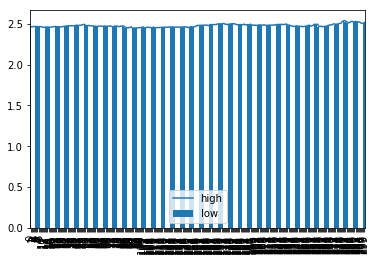

In [6]:
def pred_xtz(data,bata):
    print('Analyzing and predicting cryptocurrency. \n\n\n\n')
    data = history('xtz-usd')
    print(data.shape)
    data.head()
    data.describe()
    data.corr()
    data[['low']].plot.bar()
    high = data[['high']]
    plt.plot(high)
    plt.legend(['high','low']) 
    plt.savefig('images/high_low.png')
    y = data['high']
    X = data.drop(['high'],axis=1) 
    mini = MinMaxScaler() 
    X = mini.fit_transform(X) 
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.6) 
    reg = LinearRegression(normalize=True,n_jobs=-1)
    reg.fit(X_train,y_train)
    tscv = TimeSeriesSplit(n_splits=5)
    print(tscv)  
    TimeSeriesSplit(max_train_size=None, n_splits=4)
    for train_index, test_index in tscv.split(X):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
    from sklearn.externals import joblib
#     joblib.dump(reg, 'models/tscv_1.pkl')
    bata =  pd.read_csv(bata)
    bata.shape
    date = bata['time'] 
    print(bata.tail())  
    print(X.shape)
    future_x = X 
    X = X[-1:] 
    bata = bata
    date = bata['time'] 
    date = date.tail()
    bata = bata.tail() 
    date = bata['time']
#     print('PREDICTED HIGH')
    y = reg.predict(future_x) 
    y_df = pd.DataFrame(y) 
    y_df.to_csv('pred.csv')
    y
    plt.plot(y) 
    plt.show()
    plt.savefig('images/PREDICTED_HIGH.png')    
    plt.close() 
    print('current xtz balance {}'.format(current_xtz))
    print('current xtz price',current_priceXTZ)
    print('predicted high xtz portfolio balance',y[-1:]*auth_client_xtz)
    print('predicted high xtz',y[-1:])
#     if float(y[-1:]) <= float(current_priceXTZ):
#     print('buying XTZ')
#     auth_client.place_market_order(product_id='XTZ-USD', 
#                                            side='buy', 
#                                            funds='60.00') 
#     print('BUYING EOS')
#     auth_client.place_market_order(product_id='EOS-USD', 
#                                            side='buy', 
#                                            funds='40.00') 
# #         print('Selling KNC')
# #         auth_client.place_market_order(product_id='KNC-USD',side='sell',size='11.8')       
# #     if float(y[-1:]) >= float(current_priceXTZ):
# #         print('selling XTZ')
# #         auth_client.place_market_order(product_id='XTZ-USD',side='sell',size='2.39')
# #         print('selling EOS')
# #         auth_client.place_market_order(product_id='EOS-USD',side='sell',size='2')     
#     print('buying knc')
#     auth_client.place_market_order(product_id='KNC-USD', 
#                                                 side='buy', 
#                                                 funds='25.00')       

     
# #     if float(y[-1:]) == float(current_priceXTZ):
# #         print('holding')        

    return bata.tail()
pred_xtz('data/crypto/crypto_portfolio/5m/bitfinex_xtzusd.csv','data/crypto/crypto_portfolio/5m/bitfinex_xtzusd.csv')

Analyzing and predicting cryptocurrency. 




(300, 6)


C:\Users\peace\Anaconda3_2\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


TimeSeriesSplit(max_train_size=None, n_splits=5)
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49] TEST: [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99] TEST: [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  2

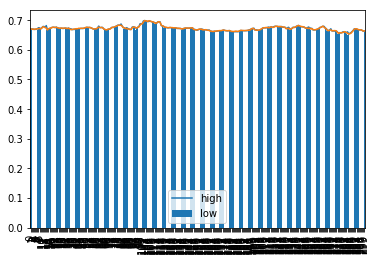

current knc balance 7.3601
current knc price 0.6691
predicted high knc portfolio balance [7.29787706]
predicted high knc [0.66344337]
buying KNC
selling XLM


,time,open,high,low,close,volume
295,1588055700,0.6644,0.6666,0.6654,0.6656,15648.4
296,1588055400,0.6654,0.6671,0.6660,0.6661,4349.8
297,1588055100,0.6618,0.6654,0.6618,0.6654,3177.8
298,1588054800,0.6618,0.6627,0.6618,0.6618,4386.4
299,1588054500,0.6596,0.6628,0.6603,0.6628,10733.3


In [314]:
def pred_knc():
    print('Analyzing and predicting cryptocurrency. \n\n\n\n')
    data = history('knc-usd')
    print(data.shape)
    data.head()
    data.describe()
    data.corr()
    data[['low']].plot.bar()
    high = data[['high']]
    plt.plot(high)
    plt.legend(['high','low']) 
    plt.savefig('images/high_low.png')
    y = data['high']
    X = data.drop(['high'],axis=1) 
    mini = MinMaxScaler() 
    X = mini.fit_transform(X) 
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.6) 
    reg = LinearRegression(normalize=True,n_jobs=-1)
    reg.fit(X_train,y_train)
    tscv = TimeSeriesSplit(n_splits=5)
    print(tscv)  
    TimeSeriesSplit(max_train_size=None, n_splits=4)
    for train_index, test_index in tscv.split(X):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
    from sklearn.externals import joblib
#     joblib.dump(reg, 'models/tscv_1.pkl')
    bata =  history('knc-usd')
    bata.shape
    date = bata['time'] 
    print(bata.tail())
    print(X.shape)
    future_x = X 
    X = X[-1:] 
    bata = bata
    date = bata['time'] 
    date = date.tail()
    bata = bata.tail() 
    date = bata['time']
    y = reg.predict(future_x) 
    y_df = pd.DataFrame(y) 
    y_df.to_csv('pred.csv')
    y
    plt.plot(y) 
    plt.show()   
    plt.close()
    print('current knc balance {}'.format(current_knc))
    print('current knc price',current_priceKNC)
    print('predicted high knc portfolio balance',y[-1:]*auth_client_knc)
    print('predicted high knc',y[-1:])
    if float(y[-1:]) <= float(current_priceKNC):
        print('buying KNC')
        auth_client.place_market_order(product_id='KNC-USD', 
                                           side='buy', 
                                           funds='5.67')  
        print('selling XLM')
        auth_client.place_market_order(product_id='XLM-USD',side='sell',size='81')
        
    if float(y[-1:]) >= float(current_priceKNC):
        print('selling KNC')
        auth_client.place_market_order(product_id='KNC-USD',side='sell',size='2.2') 
        print('buying XLM')
        auth_client.place_market_order(product_id='XLM-USD', 
                                           side='buy', 
                                           funds='5.67') 
        
    if float(y[-1:]) == float(current_priceXLM):
        print('holding')
    return bata.tail()
pred_knc()

Analyzing and predicting cryptocurrency. 




(300, 6)


C:\Users\peace\Anaconda3_2\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


TimeSeriesSplit(max_train_size=None, n_splits=5)
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49] TEST: [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99] TEST: [100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  2

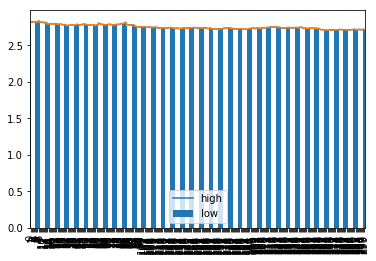

current EOS balance 9.2829
current EOS price 2.813
predicted high EOS portfolio balance [8.96080772]
predicted high EOS [2.71539628]
buying eos
Selling KNC


,time,open,high,low,close,volume
481,1588136400000,2.781200,2.782530,2.786500,2.7804,11488.625516
482,1588137300000,2.782600,2.787100,2.795000,2.7826,19306.541030
483,1588138200000,2.786900,2.792700,2.793406,2.7851,14772.659665
484,1588139100000,2.790692,2.786300,2.790692,2.7849,3310.985652
485,1588140000000,2.787800,2.798307,2.811700,2.7878,10660.165180


In [315]:
def pred_DNT(data,bata):
    print('Analyzing and predicting cryptocurrency. \n\n\n\n')
    data = history('DNT-usd')
    print(data.shape)
    data.head()
    data.describe()
    data.corr()
    data[['low']].plot.bar()
    high = data[['high']]
    plt.plot(high)
    plt.legend(['high','low']) 
    plt.savefig('images/high_low.png')
    y = data['high']
    X = data.drop(['high'],axis=1) 
    mini = MinMaxScaler() 
    X = mini.fit_transform(X) 
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.6) 
    reg = LinearRegression(normalize=True,n_jobs=-1)
    reg.fit(X_train,y_train)
    tscv = TimeSeriesSplit(n_splits=5)
    print(tscv)  
    TimeSeriesSplit(max_train_size=None, n_splits=4)
    for train_index, test_index in tscv.split(X):
        print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
    from sklearn.externals import joblib
#     joblib.dump(reg, 'models/tscv_1.pkl')

    bata =  pd.read_csv(bata)
    bata.shape
    date = bata['time'] 
    print(bata.tail())
    print(X.shape)
    future_x = X 
    X = X[-1:] 

    bata = bata
    date = bata['time'] 
    date = date.tail()
    bata = bata.tail() 
    date = bata['time']
    y = reg.predict(future_x) 
    y_df = pd.DataFrame(y) 
    y_df.to_csv('pred.csv')
    y
    plt.plot(y) 
    plt.show()
    plt.close()
    print('current DNT balance {}'.format(current_dnt))
    print('current DNT price',current_priceDNT)
    print('predicted high DNT portfolio balance',y[-1:]*auth_client_dnt)
    print('predicted high DNT',y[-1:])
    if float(y[-1:]) <= float(current_priceDNT):
        print('buying DNT')
        auth_client.place_market_order(product_id='DNT-USD', 
                                           side='buy', 
                                           funds='8.00')    
        print('Selling KNC')
        auth_client.place_market_order(product_id='KNC-USD',side='sell',size='11.8')        
    if float(y[-1:]) >= float(current_priceDNT):
        print('selling DNT')
        auth_client.place_market_order(product_id='DNT-USD',side='sell',size='2.85')
        print('buying knc')
        auth_client.place_market_order(product_id='KNC-USD', 
                                           side='buy', 
                                           funds='5.67')
         
    if float(y[-1:]) == float(current_priceDNT):
        print('holding')

    return bata.tail()
pred_DNT('data/crypto/crypto_portfolio/15m/bitfinex_dntusd.csv','data/crypto/crypto_portfolio/15m/bitfinex_dntusd.csv')